# Assembly of our images captured by Light Sheet Fluorescent Microscopy in space and time

This notebook is the first to be executed in order to create a 3D video of the heart over a cardiac cycle.
**use the environment "myenv" for this notebook"**

In this example, the zebrafish heart was captured by a light sheet fluorescent microscope with a frequency of 150 im/sec on 201 slices. This microscope stopped at each slice and captured 1 second of images. The z-movies have been imported into this notebook and can be found in the folder called 'Z-slices'.

## The basic procedures : 

A - Determination of the length of a cardiac cycle

B - Extension of each z-movie to complete the second cycle

C - Visualization of the correlation graphs of the last 175 z-movies with image 150 as the reference image

D - Determination of the time shifts between each z-movie

E - Final assembly

## A - Determination of the length of a cardiac cycle

The first step of the assembly is to identify the number of images constituting a cardiac cycle and remove the rest. This was achieved using the Spearman correlation method. For instance, in one z-movie, we selected a reference image and compared it with every other 150 images of the z-movie using the scipy.stats.spearmanr() Python function. The first peak corresponds to the correlation with the reference image itself, while the second peak corresponds to the correlation with an image similar to the reference image in the next cycle. Therefore, the gap between the two peaks represents the length of one cardiac cycle.

By repeating this process for every image from z-movie 116 to 120, we plotted a graph showing the frequency of cycle lengths, from which we concluded that a cycle lasts 92 images.

This operation was performed only on z-movies 116 to 120 as they are located towards the middle of the heart. Deformations related to contraction are more easily observable, thus making the identification of the length of the cardiac cycle more precise. If images from the extremities were chosen, there would be more black pixels related to the image background than pixels representing the hearts, which would have made the correlation less reliable.

global_length_cycle_list: [93, 93, 93, 93, 93, 93, 93, 93, 92, 94, 93, 93, 93, 92, 93, 93, 94, 93, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 93, 92, 92, 92, 92, 92, 93, 92, 92, 93, 93, 92, 93, 92, 92, 93, 93, 92, 93, 92, 93, 92, 93, 93, 93, 93, 92, 93, 93, 93, 93, 93, 92, 92, 92, 93, 93, 94, 93, 93, 92, 93, 93, 93, 93, 93, 92, 93, 94, 92, 91, 91, 92, 91, 92, 93, 92, 85, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 91, 91, 93, 93, 92, 93, 92, 92, 91, 92, 92, 91, 94, 94, 94, 93, 94, 95, 94, 95, 94, 95, 94, 95, 94, 95, 94, 95, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 95, 94, 94, 94, 92, 95, 95, 94, 93, 94, 94, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 9

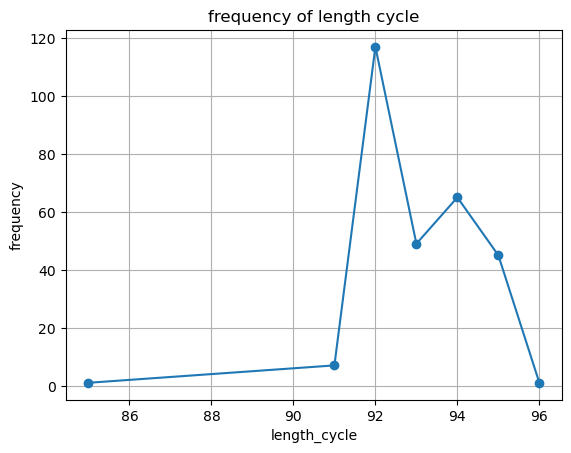

In [3]:
import matplotlib.pyplot as plt
import imageio
import numpy as np
import scipy.stats

# execution time : between 20 and 30 min

# Initialisations
z_slice_dict = {}

#z_slice_tab_dict = {}

z_slice_list_dict = {}

z_slice_length_cycle_dict = {}

global_length_cycle_list = []

# 1 - Loop 'for i' to open all z slices.
# 2 - Nested loops 'for j' and 'for k' to calculate the correlation between all images for all z-movies.

for i in range(116, 121):
    my_tif_file = f'Z-slices/z_slice_{i}.tif'
    z_slice_dict[f'z_slice_{i}'] = imageio.volread(my_tif_file)  # Store the images in the dictionary
    z_slice_length_cycle_dict[f'length_cycle_z_slice_{i}'] = []

    for j in range(len(z_slice_dict[f'z_slice_{i}'])):
        reference_image = z_slice_dict[f'z_slice_{i}'][j] # Choose image [j] as the reference image for z-movie i
        list_px_reference_image = reference_image.flatten() # Convert all pixels of the reference image to a 1-D array, required for calculating spearmanr
        
        z_slice_list_dict[f'liste_spearmanr_z_slice_{i}_imref_{j}']=[] #fill up a list with every correlation value between a reference image and every other of the z-movie
        
        #number_of_p_value_Spearman = 0

        for k in range(len(z_slice_dict[f'z_slice_{i}'])):
            current_image =z_slice_dict[f'z_slice_{i}'][k] # for one ref image j, iterate through all images k of a z-movie i
            list_px_current_image = current_image.flatten() # Convert all pixels of the reference image to a 1-D array, required for calculating spearmanr
            corr_k, p_value_k = scipy.stats.spearmanr(list_px_reference_image, list_px_current_image)
            z_slice_list_dict[f'liste_spearmanr_z_slice_{i}_imref_{j}'].append(corr_k)

            #if p_value_k < 0.05:
            #    number_of_p_value_Spearman += 1


        # 3 - Calculate the cycle length for each z-movie
        z_slice_list_dict[f'liste_spearmanr_z_slice_{i}_imref_{j}'] = z_slice_list_dict[f'liste_spearmanr_z_slice_{i}_imref_{j}'][np.argmax(z_slice_list_dict[f'liste_spearmanr_z_slice_{i}_imref_{j}']):] 
        # We cut each list so that index 0 represents the correlation value of the reference image with itself.
        # Therefore, the index of the second peak will be equal to the number of images in the cycle.
        
        # Identification of the second peak :
        maxi = 0
        for m in range(1, len(z_slice_list_dict[f'liste_spearmanr_z_slice_{i}_imref_{j}']) - 1):
            if (
                z_slice_list_dict[f'liste_spearmanr_z_slice_{i}_imref_{j}'][m] > z_slice_list_dict[f'liste_spearmanr_z_slice_{i}_imref_{j}'][m - 1]
                and z_slice_list_dict[f'liste_spearmanr_z_slice_{i}_imref_{j}'][m] > z_slice_list_dict[f'liste_spearmanr_z_slice_{i}_imref_{j}'][m + 1]
                and 0.9 < z_slice_list_dict[f'liste_spearmanr_z_slice_{i}_imref_{j}'][m] 
                and z_slice_list_dict[f'liste_spearmanr_z_slice_{i}_imref_{j}'][m] < 1
                and z_slice_list_dict[f'liste_spearmanr_z_slice_{i}_imref_{j}'][m] > maxi
            ):
                maxi = z_slice_list_dict[f'liste_spearmanr_z_slice_{i}_imref_{j}'][m]
                max_index = z_slice_list_dict[f'liste_spearmanr_z_slice_{i}_imref_{j}'].index(maxi)

        if maxi != 0:
            #print("maxi :",maxi)
            #print("max_index :", max_index)
            z_slice_list_dict[f'liste_spearmanr_z_slice_{i}_imref_{j}'] = z_slice_list_dict[f'liste_spearmanr_z_slice_{i}_imref_{j}'][:max_index] # No +1 because in Python, the slicing operator ":" does not include the element at the end index.
            #print("length :", len(z_slice_list_dict[f'liste_spearmanr_z_slice_{i}_imref_{j}']))
            z_slice_length_cycle_dict[f'length_cycle_z_slice_{i}'].append(len(z_slice_list_dict[f'liste_spearmanr_z_slice_{i}_imref_{j}']))
        else:
            pass # Do not add anything because there is no complete cycle.
        
    # 4 - Plot a frequency graph for all combined z-movies (x-axis: number of images per cycle, y-axis: frequency)
    # Use numpy.unique to get unique values and their frequencies
    global_length_cycle_list += z_slice_length_cycle_dict[f'length_cycle_z_slice_{i}']
    
print("global_length_cycle_list:", global_length_cycle_list)

length_cycle, freq = np.unique(global_length_cycle_list, return_counts=True)
length_cycle_with_max_freq = length_cycle[np.argmax(freq)]
print("length_cycle_with_max_freq:",length_cycle_with_max_freq)
plt.plot(length_cycle, freq, marker='o', linestyle='-')
plt.xlabel('length_cycle')
plt.ylabel('frequency')
plt.title('frequency of length cycle')
plt.grid(True)
plt.show()



## B - Extension of each z-movie to complete the second cycle

To determine the time shift of the z-movies, each image of a z-movie must be compared with those of the following z-movie using Spearman's correlation. The technique was to create a new folder with duplicated z-movies called "z-slices_bis" and extend them so that they all have 2 cardiac cycles. This allows the step "D - Determination of the time shifts between each z-movie" to use all images of a z-movie{i} as reference images and compare them with those of the following z-movie, which has been completed and saved as z-movie_bis{i+1}.

If at step D, we had decided to compare only the images of z-movie{i} with those of z-movie{i+1}, we would have observed a roughly constant shift of 35, for example, for the images corresponding to the entire cycle of z-movie{i}, followed by 35 smaller values.

In [3]:
import matplotlib.pyplot as plt
import imageio
import numpy as np
import scipy.stats 

# execution time : between 20 and 30 min

# Initialisations
z_slice_dict = {}

#z_slice_tab_dict = {}

z_slice_list_dict = {}

length_cycle_with_max_freq = 92

# 1 - Loop 'for i' to open all z slices.
# 2 - Nested loops 'for k' to calculate the correlation between all images for all z-movies.

for i in range(0,201):
    my_tif_file = f'Z-slices/z_slice_{i}.tif' 
    z_slice_dict[f'z_slice_{i}'] = imageio.volread(my_tif_file)  # Store the images in the dictionary

    reference_image = z_slice_dict[f'z_slice_{i}'][149] # Choose image [149] as the reference image for z-movie i
    list_px_reference_image = reference_image.flatten() # Convert all pixels of the reference image to a 1-D array, required for calculating spearmanr
        
    z_slice_list_dict[f'liste_spearmanr_z_slice_{i}_imref_150']=[]
        

    for k in range(len(z_slice_dict[f'z_slice_{i}'])):
        current_image =z_slice_dict[f'z_slice_{i}'][k] # for the ref image [149], iterate through all images k of a z-movie i
        list_px_current_image = current_image.flatten() # Convert all pixels of the reference image to a 1-D array, required for calculating spearmanr
        corr_k, p_value_k = scipy.stats.spearmanr(list_px_reference_image, list_px_current_image)
        z_slice_list_dict[f'liste_spearmanr_z_slice_{i}_imref_150'].append(corr_k)
        #lk.append(k)
        #lcorr.append(corr_k)

        # 3 - Calculate the cycle length for each z-movie
        
    maxi = 0
    e2 = round(length_cycle_with_max_freq*1/10) 
    for m in range(len(z_slice_list_dict[f'liste_spearmanr_z_slice_{i}_imref_150']) - length_cycle_with_max_freq - e2, len(z_slice_list_dict[f'liste_spearmanr_z_slice_{i}_imref_150']) - length_cycle_with_max_freq + e2):
        
        if (
            z_slice_list_dict[f'liste_spearmanr_z_slice_{i}_imref_150'][m] > z_slice_list_dict[f'liste_spearmanr_z_slice_{i}_imref_150'][m - 1]
            and z_slice_list_dict[f'liste_spearmanr_z_slice_{i}_imref_150'][m] > z_slice_list_dict[f'liste_spearmanr_z_slice_{i}_imref_150'][m + 1]
            and 0.65 < z_slice_list_dict[f'liste_spearmanr_z_slice_{i}_imref_150'][m] #It was 0.9 at the beginning, then changed by 0.88 for Z_slice_131,134,136,137...174, by 0.86 for Z_slice_175 ... and by 0.65 for Z_slice_200 
            and z_slice_list_dict[f'liste_spearmanr_z_slice_{i}_imref_150'][m] < 1
            and z_slice_list_dict[f'liste_spearmanr_z_slice_{i}_imref_150'][m] > maxi
        ):
            maxi = z_slice_list_dict[f'liste_spearmanr_z_slice_{i}_imref_150'][m]
            max_index = z_slice_list_dict[f'liste_spearmanr_z_slice_{i}_imref_150'].index(maxi)

    if maxi != 0:
        z_slice_dict[f'z_slice_{i}_bis'] = z_slice_dict[f'z_slice_{i}']
        additional_images = z_slice_dict[f'z_slice_{i}'][max_index + 1:len(z_slice_dict[f'z_slice_{i}'])] #add one cardiac cycle
        z_slice_dict[f'z_slice_{i}_bis'] = np.concatenate([z_slice_dict[f'z_slice_{i}_bis'], additional_images]) # 150 im + 1 cycle

    else:
        pass # do nothing
    
    print(f'{i}',len(z_slice_dict[f'z_slice_{i}_bis']))
        

    # Path to save the file
    output_path = f'Z-slices_bis/z_slice_{i}_bis.tif'

    # Save all the images
    imageio.volwrite(output_path, z_slice_dict[f'z_slice_{i}_bis'])
    


200 250


## C - Visualization of the correlation graphs of the last 175 z-movies with image 150 as the reference image

This step is used to visualize the correlation graphs between image 150 of a z-movie and all the other images of the z-movie. In the previous program, at the line "and 0.65 < z_slice_list_dict[f'liste_spearmanr_z_slice_{i}_imref_150'][m]", the program was getting stuck for z-movies number 175 to number 200 because the maximum correlation was below 0.9. Therefore, it was necessary to display the graphs and visually check if the peaks that were below 0.9 were still reliable.

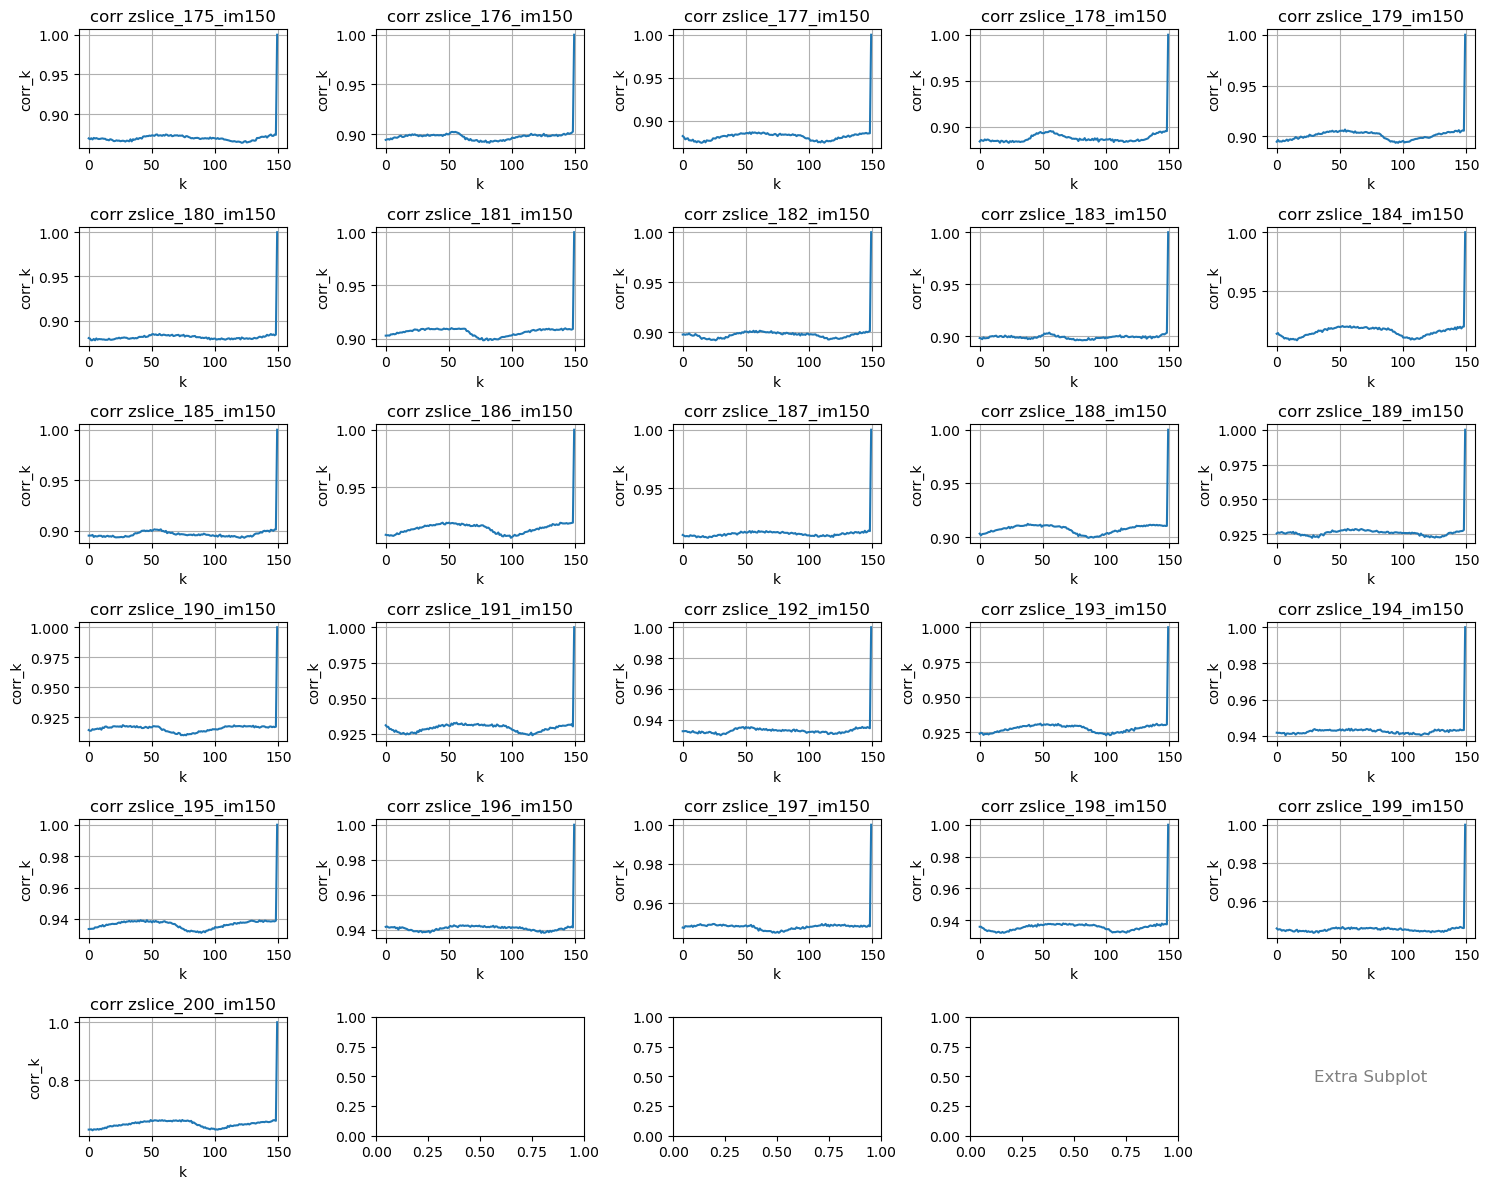

In [35]:
import matplotlib.pyplot as plt
import scipy.stats
import imageio

z_slice_dict = {} 
z_slice_list_dict = {}  

# Set up the subplot grid
num_rows = 6
num_cols = 5

# Set the figure size
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))

for i, ax in zip(range(175, 201), axes.flatten()):
    my_tif_file = f'Z-slices/z_slice_{i}.tif' 
    z_slice_dict[f'z_slice_{i}'] = imageio.volread(my_tif_file)  # Store the images in the dictionary

    reference_image = z_slice_dict[f'z_slice_{i}'][149]  # Choose image [149] as the reference image for z-movie i
    list_px_reference_image = reference_image.flatten()  # Convert all pixels of the reference image to a 1-D array, required for calculating spearmanr
        
    z_slice_list_dict[f'liste_spearmanr_z_slice_{i}_imref_150'] = []
    
    lk = []  # Reset lk for each iteration
    lcorr = []  # Reset lcorr for each iteration

    for k in range(len(z_slice_dict[f'z_slice_{i}'])):
        current_image = z_slice_dict[f'z_slice_{i}'][k]  # for the ref image [149], iterate through all images k of a z-movie i
        list_px_current_image = current_image.flatten()  # Convert all pixels of the reference image to a 1-D array, required for calculating spearmanr
        corr_k, p_value_k = scipy.stats.spearmanr(list_px_reference_image, list_px_current_image)
        z_slice_list_dict[f'liste_spearmanr_z_slice_{i}_imref_150'].append(corr_k)
        lk.append(k)
        lcorr.append(corr_k)
    
    ax.plot(lk, lcorr)
    ax.set_xlabel('k')
    ax.set_ylabel('corr_k')
    ax.set_title(f'corr zslice_{i}_im150')
    ax.grid(True)

# Add an extra subplot at the end
plt.subplot(num_rows, num_cols, num_rows * num_cols)
plt.axis('off')  # Turn off the axes for the extra subplot
plt.text(0.5, 0.5, 'Extra Subplot', ha='center', va='center', fontsize=12, color='gray')

# Adjust layout and show the figure
plt.tight_layout()
plt.show()


## D - Determination of the time shifts between each z-movie

Ce programme permet de determiner le time shift qui a la plus grande frequence entre chaque z-movie voisins et de les mettre dans une liste. 

In [1]:
import matplotlib.pyplot as plt
import imageio
import numpy as np
import scipy.stats
from statistics import mean

#Time with GPU : 

# Initialisations
z_slice_dict = {}


z_slice_list_corr_dict = {}

list_shift_z_slices = {}

list_shift_with_max_freq = []

length_cycle_with_max_freq = 92

list_argmax = []

#lk = []

# Opening the z-slices // two by two
for i in range(0,200): 
    my_tif_file_i = f'Z-slices/z_slice_{i}.tif' # Define z-movie file path
    z_slice_dict[f'z_slice_{i}'] = imageio.volread(my_tif_file_i) # Store the images in the dictionary
    my_tif_file_iplus1_bis = f'Z-slices_bis/z_slice_{i+1}_bis.tif' # Define z-movie bis file path
    z_slice_dict[f'z_slice_{i+1}_bis'] = imageio.volread(my_tif_file_iplus1_bis)  # Store the images in the dictionary
    print(f'{i+1}',len(z_slice_dict[f'z_slice_{i+1}_bis'])) # See how the algorithm progresses
    
    z_slice_list_corr_dict[f'list_spearmanr_z_slice_{i}_imref{0}_with_z_slice_{i+1}_bis'] = [] # Create a list to store correlations between imref0 of a z-movie i and all the images of z-movie i+1
    list_shift_z_slices[f'shift_z_slice{i}_and_z_slice{i+1}_bis'] = [] # Create a list to store the shifts between the z-movies i and i+1
    reference_image = z_slice_dict[f'z_slice_{i}'][0] # Open the imref0
    list_px_reference_image = reference_image.flatten() # Convert all pixels of the reference image to a 1-D array, required for calculating spearmanr
    
    for k in range(len(z_slice_dict[f'z_slice_{i+1}_bis'])):
        current_image =z_slice_dict[f'z_slice_{i+1}_bis'][k] # for the imref0, iterate through all images k of a z-movie {i+1}_bis
        list_px_current_image = current_image.flatten() # Convert all pixels of the reference image to a 1-D array, required for calculating spearmanr
        corr_k, p_value_k = scipy.stats.spearmanr(list_px_reference_image, list_px_current_image) # Calculate Spearman correlation between imref0 of z-movie i and all images of z-slice i+1
        z_slice_list_corr_dict[f'list_spearmanr_z_slice_{i}_imref{0}_with_z_slice_{i+1}_bis'].append(corr_k) # Add corr_k to the list
        #lk.append(k)
    
    the_max = np.argmax(z_slice_list_corr_dict[f'list_spearmanr_z_slice_{i}_imref{0}_with_z_slice_{i+1}_bis'][:length_cycle_with_max_freq]) 
    list_argmax. append(the_max) # For each comparison of each imref0 from z-movie i with all the images of z-movie i+1, store the shift (since the index of the image corresponding to the max is also the shift)
    mean_shift_imref0 = mean(list_argmax) # Calculate the average of the shifts
    

    for j in range(1,len(z_slice_dict[f'z_slice_{i}'])):
        reference_image = z_slice_dict[f'z_slice_{i}'][j] # Select one ref image j
        list_px_reference_image = reference_image.flatten() # Convert all pixels of the reference image to a 1-D array, required for calculating spearmanr
        e = round(mean_shift_imref0/3) # Create an interval
        z_slice_list_corr_dict[f'list_spearmanr_z_slice_{i}_imref{j}_avec_z_slice_{i+1}_bis']=[0]*(j + mean_shift_imref0 - e) # Create a list of zeros with a size equal to the lower margin of the interval
        
        for k in range(j + mean_shift_imref0 - e, j + mean_shift_imref0 + e + 1): 
            current_image =z_slice_dict[f'z_slice_{i+1}_bis'][k] # for image {j}, iterate through all images k of a z-movie {i}
            list_px_current_image = current_image.flatten() # Convert all pixels of the reference image to a 1-D array, required for calculating spearmanr
            corr_k, p_value_k = scipy.stats.spearmanr(list_px_reference_image, list_px_current_image) # Calculate Spearman correlation between image {j} of z-movie i and all images of z-slice i+1
            z_slice_list_corr_dict[f'list_spearmanr_z_slice_{i}_imref{j}_avec_z_slice_{i+1}_bis'].append(corr_k)
                    
        indice_max = np.argmax(z_slice_list_corr_dict[f'list_spearmanr_z_slice_{i}_imref{j}_avec_z_slice_{i+1}_bis'])
        element_colonne_1 = j
        element_colonne_2 = indice_max
        element_colonne_3 = (element_colonne_2 - element_colonne_1)
        list_shift_z_slices[f'shift_z_slice{i}_and_z_slice{i+1}_bis'].append(element_colonne_3)
        

    shift, freq = np.unique(list_shift_z_slices[f'shift_z_slice{i}_and_z_slice{i+1}_bis'], return_counts=True)
    shift_with_max_freq = shift[np.argmax(freq)]
    print ("shift :", shift)
    print("freq :", freq)
    print("shift_with_max_freq :", shift_with_max_freq)
    list_shift_with_max_freq.append(shift_with_max_freq)

    
print("list_argmax:",list_argmax)
print("moyenne list shift imref0:", mean_shift_imref0)

print("list_shift_with_max_freq :", list_shift_with_max_freq)
print("longueur de la liste des shift :", len(list_shift_with_max_freq))



# Result for "for i in range(116,120)" with explanation:

# shift: [33 34 35 36 37] I compare the images of z-movie 116 with those of z-movie 117, and I look at the shifts and their frequency.
# Freq: [ 2 30 70 45  2] 2+30+70+45+2=149 shifts
# shift with max frequency: 35 I look at the shift with the highest frequency and store it in the list "list_shift_with_max_freq"
# shift: [33 34 35 36 37] I compare the images of z-movie 117 with those of z-movie 118, and I look at the shifts and their frequency.
# Freq: [ 5  9 51 55 29] ...
# Gap with max frequency: 36 ...
# shift: [36 37 38 39] ...
# Freq: [61 24 53 11]
# shift with max frequency: 36
# shift: [36 37 38 39 40 41 42]
# Freq: [ 1  2 10 72 53  9  2]
# shift with max frequency: 39
# list_shift_with_max_freq: [35, 36, 36, 39] list of shifts with max frequency for z-movies 116 117 118 119
# Length of the gap list: 4



1 246
ecart : [28 31 33 34 35 36 37 38 39 40 41 42 43 44 45 46 49 51]
freq : [ 3  3  2  3  6 10 23 31 21 12 11  8  3  3  4  4  1  1]
ecart_with_max_freq : 38
2 243
ecart : [28 33 34 35 36 37 38 39 40 41 42]
freq : [ 1  1  3  7 15 40 46 21  8  5  2]
ecart_with_max_freq : 38
3 243
ecart : [26 27 28 30 31 32 33 34 35 36 37 38 39 40 41 42 43 45 46]
freq : [ 3  1  1  1  3  5  1  6  6  4  9 14 29 43 15  4  2  1  1]
ecart_with_max_freq : 40
4 243
ecart : [27 28 29 30 32 33 34 35 36 37 38 39 40 41 42 43]
freq : [ 1  1  3  2  1  3  2  6 20 24 33 21 15 13  2  2]
ecart_with_max_freq : 38
5 248
ecart : [26 27 32 34 35 36 37 38 39 40 41 42 43 44 45 46]
freq : [ 1  1  2  1  4  8 12 33 29  6  8 14 20  7  2  1]
ecart_with_max_freq : 38
6 242
ecart : [27 29 30 31 32 33 34 35 36 37 38 39 40 42 43 45 47 48]
freq : [ 1  1  1  1  2  6 10 22 44 30 17  5  2  1  2  2  1  1]
ecart_with_max_freq : 36
7 244
ecart : [29 32 33 34 35 36 37 38 39 40 42 43]
freq : [ 1  1  1  3  7 12 40 58 20  4  1  1]
ecart_with_max_

## E - Final assembly

In [4]:
import os
import matplotlib.pyplot as plt
import imageio
import numpy as np
import scipy.stats
import numpy as np
import skimage.io as io

num_slices = 201
num_frames = 92
height = 320
width = 300
length_cycle_with_max_freq = 92

list_shift_with_max_freq = [38, 38, 40, 38, 38, 36, 38, 38, 39, 37, 40, 40, 36, 35, 35, 34, 36, 36, 36, 35, 36, 35, 36, 38, 36, 36, 37, 36, 36, 35, 35, 35, 36, 38, 35, 34, 35, 34, 34, 34, 36, 35, 36, 36, 34, 35, 34, 35, 36, 33, 34, 34, 34, 34, 32, 34, 35, 35, 34, 35, 33, 33, 35, 34, 34, 36, 35, 34, 33, 34, 33, 33, 34, 33, 32, 36, 35, 33, 33, 33, 38, 35, 34, 35, 38, 37, 34, 34, 36, 35, 35, 36, 35, 36, 38, 36, 37, 37, 38, 39, 36, 38, 35, 34, 38, 37, 37, 39, 37, 36, 35, 38, 38, 35, 39, 35, 35, 36, 36, 39, 35, 36, 38, 38, 37, 37, 37, 38, 37, 39, 39, 37, 38, 36, 38, 40, 39, 40, 38, 38, 37, 37, 37, 35, 35, 37, 37, 39, 37, 38, 41, 41, 39, 38, 39, 38, 38, 39, 38, 39, 37, 39, 41, 39, 41, 39, 39, 39, 40, 39, 42, 42, 38, 41, 38, 39, 40, 39, 39, 40, 40, 39, 43, 39, 40, 43, 44, 42, 38, 41, 42, 38, 41, 41, 38, 38, 42, 47, 41, 46]

# Initialisations

z_slice_dict = {}


z_slice_list_dict = {}


list_shift_with_max_freq.insert(0, 0)

for j in range (1,201):
    list_shift_with_max_freq[j] = list_shift_with_max_freq[j] + list_shift_with_max_freq[j-1]
    if list_shift_with_max_freq[j] > 92 :
        list_shift_with_max_freq[j] = list_shift_with_max_freq[j] - 92
        
print(list_shift_with_max_freq)


# 1 - Boucle for i pour ouvrir toutes les z slices et les decouper pour n'obtenir q'un cycle 

my_tif_file = f'Z-slices/z_slice_{0}.tif' 
z_slice_dict[f'z_slice_{0}'] = imageio.volreadmy_tif_file)  # Stocker les images dans le dico
z_slice_dict[f'z_slice_{0}_un_cycle'] = z_slice_dict[f'z_slice_{0}'][:length_cycle_with_max_freq] # No +1 because in Python, the slicing operator does not include the element at the end index. So, we go from 0 to 91, which is 92 images. 
# Si on sauvegarde le nouveau fichier
new_path = f'Z-slices_un_cycle/z_slice_{0}_un_cycle.tif'
imageio.volwrite(new_path, z_slice_dict[f'z_slice_{0}_un_cycle'])


for i in range(1,201):
    my_tif_file = f'Z-slices/z_slice_{i}.tif' 
    z_slice_dict[f'z_slice_{i}'] = imageio.volread(my_tif_file)  
    z_slice_recoupees = z_slice_dict[f'z_slice_{i}'][list_shift_with_max_freq[i]:length_cycle_with_max_freq] # No +1 because in Python, the slicing operator does not include the element at the end index. So, we go from 0 to 91, which is 92 images. 
    
    decalage = z_slice_dict[f'z_slice_{i}'][:list_shift_with_max_freq[i]]
    z_slice_dict[f'z_slice_{i}_un_cycle'] = np.concatenate([z_slice_recoupees, decalage])
    #print(z_slice_dict[f'z_slice_{i}_un_cycle'].shape)
    
    new_path = f'Z-slices_un_cycle/z_slice_{i}_un_cycle.tif'
    imageio.volwrite(new_path, z_slice_dict[f'z_slice_{i}_un_cycle'])

# assemblage
slices_dataset = []

for j in range(201):
    tiff_file_path = f'Z-slices_un_cycle/z_slice_{j}_un_cycle.tif'
    tiff_data = imageio.volread(tiff_file_path)
    slices_dataset.append(tiff_data)

#slices_dataset = np.asarray(slices_dataset)  # ZTYX
slices_dataset = np.array(slices_dataset)  # ZTYX
slices_dataset = np.expand_dims(slices_dataset, axis=2)  # ZTCYX
slices_dataset = np.swapaxes(slices_dataset, 0, 1)  # TZCYX
#print(slices_dataset.shape)
        
io.imsave('3d_with_time_heart.ome.tif', slices_dataset.astype('uint16'), imagej=True) 

[0, 38, 76, 24, 62, 8, 44, 82, 28, 67, 12, 52, 92, 36, 71, 14, 48, 84, 28, 64, 7, 43, 78, 22, 60, 4, 40, 77, 21, 57, 92, 35, 70, 14, 52, 87, 29, 64, 6, 40, 74, 18, 53, 89, 33, 67, 10, 44, 79, 23, 56, 90, 32, 66, 8, 40, 74, 17, 52, 86, 29, 62, 3, 38, 72, 14, 50, 85, 27, 60, 2, 35, 68, 10, 43, 75, 19, 54, 87, 28, 61, 7, 42, 76, 19, 57, 2, 36, 70, 14, 49, 84, 28, 63, 7, 45, 81, 26, 63, 9, 48, 84, 30, 65, 7, 45, 82, 27, 66, 11, 47, 82, 28, 66, 9, 48, 83, 26, 62, 6, 45, 80, 24, 62, 8, 45, 82, 27, 65, 10, 49, 88, 33, 71, 15, 53, 1, 40, 80, 26, 64, 9, 46, 83, 26, 61, 6, 43, 82, 27, 65, 14, 55, 2, 40, 79, 25, 63, 10, 48, 87, 32, 71, 20, 59, 8, 47, 86, 33, 73, 20, 62, 12, 50, 91, 37, 76, 24, 63, 10, 50, 90, 37, 80, 27, 67, 18, 62, 12, 50, 91, 41, 79, 28, 69, 15, 53, 3, 50, 91, 45]


/var/tmp/pbs.9491844.pbs/ipykernel_3604106/2476901591.py:81: UserWarning: 3d_with_time_heart.ome.tif is a low contrast image
  io.imsave('3d_with_time_heart.ome.tif', slices_dataset.astype('uint16'), imagej=True)
